In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

/home/ines/Downloads/tion/envs/hack3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,date,variable,value
0,2004-01-01 00:00:00,area_1,16.853
1,2004-01-01 01:00:00,area_1,16.450
2,2004-01-01 02:00:00,area_1,16.517
3,2004-01-01 03:00:00,area_1,16.873
4,2004-01-01 04:00:00,area_1,17.064


In [4]:
df["date"] = df.date.apply(pd.to_datetime)

In [5]:
df = df.set_index('date')
df = df.sort_index()

In [6]:
df.head()

,variable,value
date,,
2004-01-01 00:00:00,area_1,16.853
2004-01-01 00:00:00,area_2,126.259
2004-01-01 00:00:00,area_3,79.830
2004-01-01 01:00:00,area_1,16.450
2004-01-01 01:00:00,area_2,123.313


In [7]:
df = df.dropna()

In [8]:
df_area1 = df[df.variable=="area_1"].drop(columns="variable")
df_area2 = df[df.variable=="area_2"].drop(columns="variable")
df_area3 = df[df.variable=="area_3"].drop(columns="variable")
df_area1.shape, df_area2.shape, df_area3.shape

((12024, 1), (14976, 1), (16656, 1))

In [9]:
df_area1 = df_area1.resample("h").mean()
df_area2 = df_area2.resample("h").mean()
df_area3 = df_area3.resample("h").mean()
df_area1.shape, df_area2.shape, df_area3.shape

((12192, 1), (15480, 1), (17160, 1))

In [10]:
df_area1[df_area1["value"].isnull()==True].reset_index().date.apply(lambda x: (x.year, x.month, x.day)).drop_duplicates()

0       (2005, 3, 6)
24      (2005, 3, 7)
48      (2005, 3, 8)
72      (2005, 3, 9)
96     (2005, 3, 10)
120    (2005, 3, 11)
144    (2005, 3, 12)
Name: date, dtype: object

In [11]:
df_area2[df_area2["value"].isnull()==True].reset_index().date.apply(lambda x: (x.year, x.month, x.day)).drop_duplicates()

0       (2005, 3, 6)
24      (2005, 3, 7)
48      (2005, 3, 8)
72      (2005, 3, 9)
96     (2005, 3, 10)
120    (2005, 3, 11)
144    (2005, 3, 12)
168    (2005, 6, 20)
192    (2005, 6, 21)
216    (2005, 6, 22)
240    (2005, 6, 23)
264    (2005, 6, 24)
288    (2005, 6, 25)
312    (2005, 6, 26)
336    (2005, 9, 10)
360    (2005, 9, 11)
384    (2005, 9, 12)
408    (2005, 9, 13)
432    (2005, 9, 14)
456    (2005, 9, 15)
480    (2005, 9, 16)
Name: date, dtype: object

In [12]:
df_area3[df_area3["value"].isnull()==True].reset_index().date.apply(lambda x: (x.year, x.month, x.day)).drop_duplicates()

0       (2005, 3, 6)
24      (2005, 3, 7)
48      (2005, 3, 8)
72      (2005, 3, 9)
96     (2005, 3, 10)
120    (2005, 3, 11)
144    (2005, 3, 12)
168    (2005, 6, 20)
192    (2005, 6, 21)
216    (2005, 6, 22)
240    (2005, 6, 23)
264    (2005, 6, 24)
288    (2005, 6, 25)
312    (2005, 6, 26)
336    (2005, 9, 10)
360    (2005, 9, 11)
384    (2005, 9, 12)
408    (2005, 9, 13)
432    (2005, 9, 14)
456    (2005, 9, 15)
480    (2005, 9, 16)
Name: date, dtype: object

In [13]:
df_area1_ = df_area1.fillna(0)

In [14]:
df_area1_.plot()

In [15]:
df_area1 = (df_area1.ffill()+ df_area1.bfill())/2

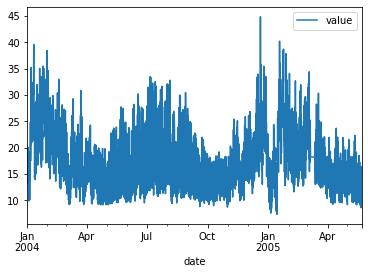

In [16]:
df_area1.plot()

In [17]:
df_area2_ = df_area2.fillna(0)

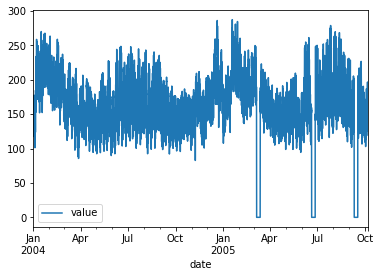

In [18]:
df_area2_.plot()

In [19]:
df_area2 = (df_area2.ffill()+ df_area2.bfill())/2

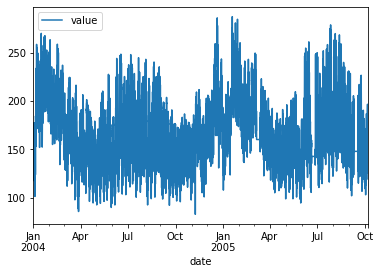

In [20]:
df_area2.plot()

In [21]:
df_area3_ = df_area3.fillna(0)

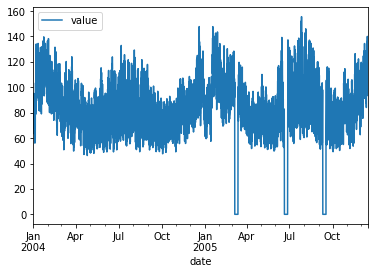

In [22]:
df_area3_.plot()

In [23]:
df_area3 = (df_area3.ffill()+ df_area3.bfill())/2

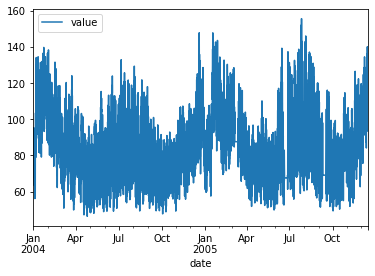

In [24]:
df_area3.plot()

In [25]:
area_1 = df_area1.sort_index()
area_2 = df_area2.sort_index()
area_3 = df_area3.sort_index()

In [26]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

In [27]:
#Area 1
mae_1 = sm.tsa.statespace.SARIMAX(train_1,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 1, 1, 24))

results_1 = mae_1.fit()
predictions_mae_1 = results_1.get_forecast(steps=168)

In [28]:
#Area 2
mae_2 = sm.tsa.statespace.SARIMAX(train_2,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 1, 1, 24))

results_2 = mae_2.fit()
predictions_mae_2 = results_2.get_forecast(steps=168)

In [ ]:
#Area 3
mae_3 = sm.tsa.statespace.SARIMAX(train_3,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 1, 1, 24))

results_3 = mae_3.fit()
predictions_mae_3 = results_3.get_forecast(steps=168)

In [ ]:
mae_1 = mean_absolute_error(test_1, predictions_mae_1.predicted_mean)
mae_2 = mean_absolute_error(test_2, predictions_mae_2.predicted_mean)
mae_3 = mean_absolute_error(test_3, predictions_mae_3.predicted_mean)

In [ ]:
mae_1, mae_2, mae_3 # 93, 44, 14

In [ ]:
#Area 1
total_mae_1 = sm.tsa.statespace.SARIMAX(area_1,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 24))

total_results_1 = total_mae_1.fit()
total_predictions_mae_1 = total_results_1.get_forecast(steps=168)

In [ ]:
#Area 2
total_mae_2 = sm.tsa.statespace.SARIMAX(area_1,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 24))

total_results_2 = total_mae_2.fit()
total_predictions_mae_2 = total_results_2.get_forecast(steps=168)

In [ ]:
#Area 3
total_mae_3 = sm.tsa.statespace.SARIMAX(area_1,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 24))

total_results_3 = total_mae_3.fit()
total_predictions_mae_3 = total_results_3.get_forecast(steps=168)